# *Introduction*

---
------------

[![EC](https://www.insaid.co/wp-content/uploads/2021/08/ecorp-logo.jpg "EC")](https://www.insaid.co/wp-content/uploads/2021/08/ecorp-logo.jpg "EC") 


> **ECorp** is an American multinational technology company that focuses on **e-commerce, cloud computing, digital streaming** and **artificial intelligence**.

> They are spread across the globe with hundreds of thousands of employees in 
these domains.

> When an employee at any company starts working, they first need to obtain the resource access necessary to fulfill their role.

> Employees passing certain criteria regarding their primary and secondary roles are granted access to the requested resources.

> This efficient system has helped the company maintain background checks of its employees and usage of allocated resources.

# *Problem Statement*

------------
------------
*  If an employee discovers that they need access to certain resources, they are supposed to contact a knowledgeable supervisor.
*  The supervisor takes time to manually grant the needed access to the requesting employee.
*  As employees move throughout a company, this access discovery/recovery cycle wastes a non-trivial amount of time and money.
*  They want to automate the process of approving or revoking access to a resource according to their role in the company.


# *Dataset Feature Description*
---------------------
------------------------
The Dataset contains the following columns:


|**Column Name**|**Description**|
| ------------- |:------------- :| 
|**RESOURCE**|An ID for each resource.|
|**MGR_ID**|The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time.|
|**ROLE_ROLLUP_1**|Company role grouping category id 1 (e.g. US Engineering).|
|**ROLE_ROLLUP_2**|Company role grouping category id 2 (e.g. US Retail).|
|**ROLE_DEPTNAME**|Company role department description (e.g. Retail).|
|**ROLE_TITLE**|Company role business title description (e.g. Senior Engineering Retail Manager)|
|**ROLE_FAMILY_DESC**|Company role family extended description (e.g. Retail Manager, Software Engineering)|
|**ROLE_FAMILY**|Company role family description (e.g. Retail Manager).|
|**ROLE_CODE**|Company role code; this code is unique to each role (e.g. Manager)|
|**ID**|ID of the Employee|
|**ACTION**|ACTION is 1 if the resource was approved, 0 if the resource was no.|
|-----------------------------------------------------------------------|-----------------------------------------------------------------------------------------| 



# *Importing all Libraries*
---------
--------

In [1]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [2]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport 
%matplotlib inline

from sklearn.feature_selection import SelectFromModel               # To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances          # To retrieve Feature Importances over model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression                 # To perform modeling using LogisticRegression
from sklearn.tree import DecisionTreeClassifier                     # To perform modeling using DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier                 # To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier                       # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier                      # To perform modeling using BaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier                     # To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier             # To perform modeling using GradientBoostingClassifier

from xgboost import XGBClassifier                                   # To perform modeling using XGBClassifier

!pip3 install catboost
from catboost import Pool, CatBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score   # To evaluate the metrics

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip freeze |grep pandas-profiling

pandas-profiling===dev


# *Load the Input files*
----------------
---------------
-   Importing the training dataset and testing dataset




In [5]:
train = pd.read_csv('https://raw.githubusercontent.com/sm24abr/Data_Repo/main/EmployeeAccessPred/ea_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/sm24abr/Data_Repo/main/EmployeeAccessPred/ea_test.csv')



In [6]:
train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
0,75078,255037,118315,118316,118202,118784,262095,290919,118786,2270,1
1,79323,3120,117961,118300,120312,120313,120314,118424,120315,696,1
2,34958,8243,118555,118178,118320,117905,117906,290919,117908,13514,1
3,39371,7520,117961,118343,124725,117905,240983,290919,117908,13400,1
4,39330,17290,117961,118386,118522,117905,117906,290919,117908,6703,1


In [7]:
test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
0,37793,81744,117902,117903,118783,118451,130134,118453,118454,18245
1,40309,1541,117961,118225,123173,119093,123174,119095,119096,9226
2,27356,205,117961,118386,118746,118784,147114,290919,118786,27195
3,5173,8229,117961,118300,121305,119351,149246,3130,119353,6478
4,77207,51791,117961,119256,120943,118995,280788,292795,118997,4813


# *Data Description*
---------------------
--------------------

In [8]:
train.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
count,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000
mean,42881.130371,25893.693278,116955.370443,118260.892741,118854.659098,125661.492594,169860.284505,183598.044556,119765.312378,16367.649292,0.941895
std,34262.362668,35746.796709,10950.867471,4841.345712,18639.574571,30491.343035,69329.221486,100563.091506,5559.507074,9464.173852,0.233948
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,0.000000,0.000000
25%,20299.000000,4564.000000,117961.000000,118102.000000,118391.000000,118274.000000,117906.000000,118363.000000,118209.000000,8149.750000,1.000000
50%,35210.000000,13441.000000,117961.000000,118300.000000,118910.000000,118568.000000,128628.000000,119095.000000,118570.000000,16403.500000,1.000000
75%,74189.250000,41786.000000,117961.000000,118386.000000,120428.000000,120006.000000,233714.000000,290919.000000,119353.000000,24524.250000,1.000000
max,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000,32768.000000,1.000000


In [9]:
test.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
count,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000
mean,43052.257903,26274.717198,116944.400830,118424.599414,119087.121079,126680.039546,171132.508605,184019.463322,119861.774564,16433.046137
std,33908.886990,36466.978203,10647.139859,3540.439044,19895.419705,32607.026621,70042.923669,100269.513113,6411.225301,9446.834176
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,4.000000
25%,20299.000000,4576.000000,117961.000000,118102.000000,118395.000000,118278.000000,117913.000000,118363.000000,118261.000000,8283.000000
50%,35531.000000,13781.000000,117961.000000,118300.000000,118979.000000,118568.000000,128942.000000,118960.000000,118570.000000,16316.000000
75%,74166.000000,44022.000000,117961.000000,118386.000000,120551.000000,120006.000000,237245.000000,290919.000000,119194.000000,24722.000000
max,312153.000000,311696.000000,247952.000000,185842.000000,277693.000000,311867.000000,311867.000000,308574.000000,258436.000000,32767.000000


In [10]:
train.skew()

RESOURCE             2.820603
MGR_ID               3.353856
ROLE_ROLLUP_1       -6.118413
ROLE_ROLLUP_2      -13.552522
ROLE_DEPTNAME       -0.375063
ROLE_TITLE           5.074521
ROLE_FAMILY_DESC     1.005623
ROLE_FAMILY         -0.078355
ROLE_CODE           13.541926
ID                  -0.001475
ACTION              -3.778031
dtype: float64

In [11]:
test.skew()

RESOURCE             2.763741
MGR_ID               3.377035
ROLE_ROLLUP_1       -7.561924
ROLE_ROLLUP_2      -15.336419
ROLE_DEPTNAME        0.284091
ROLE_TITLE           4.628182
ROLE_FAMILY_DESC     0.959064
ROLE_FAMILY         -0.077170
ROLE_CODE           12.742867
ID                   0.004507
dtype: float64

In [12]:
train.corr()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
RESOURCE,1.000000,0.010474,-0.001956,0.014442,0.023536,0.003053,0.017024,0.028848,0.008547,-0.000602,0.004709
MGR_ID,0.010474,1.000000,-0.008580,-0.002313,-0.009085,0.022017,-0.016599,-0.119074,-0.000415,0.002616,-0.005475
ROLE_ROLLUP_1,-0.001956,-0.008580,1.000000,0.029774,-0.010653,0.013483,-0.003518,0.022586,-0.023343,0.004558,-0.010529
ROLE_ROLLUP_2,0.014442,-0.002313,0.029774,1.000000,-0.002915,0.009828,0.018436,0.074391,0.015300,-0.008206,0.003042
ROLE_DEPTNAME,0.023536,-0.009085,-0.010653,-0.002915,1.000000,-0.006572,-0.007259,0.025275,0.014705,-0.009100,0.003436
ROLE_TITLE,0.003053,0.022017,0.013483,0.009828,-0.006572,1.000000,0.168525,-0.017607,0.148421,-0.004786,-0.010021
ROLE_FAMILY_DESC,0.017024,-0.016599,-0.003518,0.018436,-0.007259,0.168525,1.000000,-0.181645,0.095046,0.001997,0.009278
ROLE_FAMILY,0.028848,-0.119074,0.022586,0.074391,0.025275,-0.017607,-0.181645,1.000000,-0.151298,0.000636,0.003252
ROLE_CODE,0.008547,-0.000415,-0.023343,0.015300,0.014705,0.148421,0.095046,-0.151298,1.000000,-0.004858,0.015459
ID,-0.000602,0.002616,0.004558,-0.008206,-0.009100,-0.004786,0.001997,0.000636,-0.004858,1.000000,-0.000760


In [13]:
test.corr()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID
RESOURCE,1.000000,0.012878,-0.014552,0.009611,0.048394,0.002491,0.032981,0.037771,0.005600,0.003148
MGR_ID,0.012878,1.000000,-0.002749,0.007096,-0.010935,0.006220,-0.024130,-0.115898,-0.013522,0.014491
ROLE_ROLLUP_1,-0.014552,-0.002749,1.000000,0.049632,-0.006378,0.000818,-0.019838,0.050776,-0.029422,-0.006471
ROLE_ROLLUP_2,0.009611,0.007096,0.049632,1.000000,-0.018883,0.001865,0.020827,0.052271,0.015186,-0.004330
ROLE_DEPTNAME,0.048394,-0.010935,-0.006378,-0.018883,1.000000,-0.008153,0.009148,0.049713,-0.000479,-0.005469
ROLE_TITLE,0.002491,0.006220,0.000818,0.001865,-0.008153,1.000000,0.176569,0.001931,0.174191,0.004076
ROLE_FAMILY_DESC,0.032981,-0.024130,-0.019838,0.020827,0.009148,0.176569,1.000000,-0.177564,0.088063,-0.009223
ROLE_FAMILY,0.037771,-0.115898,0.050776,0.052271,0.049713,0.001931,-0.177564,1.000000,-0.142851,-0.022735
ROLE_CODE,0.005600,-0.013522,-0.029422,0.015186,-0.000479,0.174191,0.088063,-0.142851,1.000000,0.007779
ID,0.003148,0.014491,-0.006471,-0.004330,-0.005469,0.004076,-0.009223,-0.022735,0.007779,1.000000


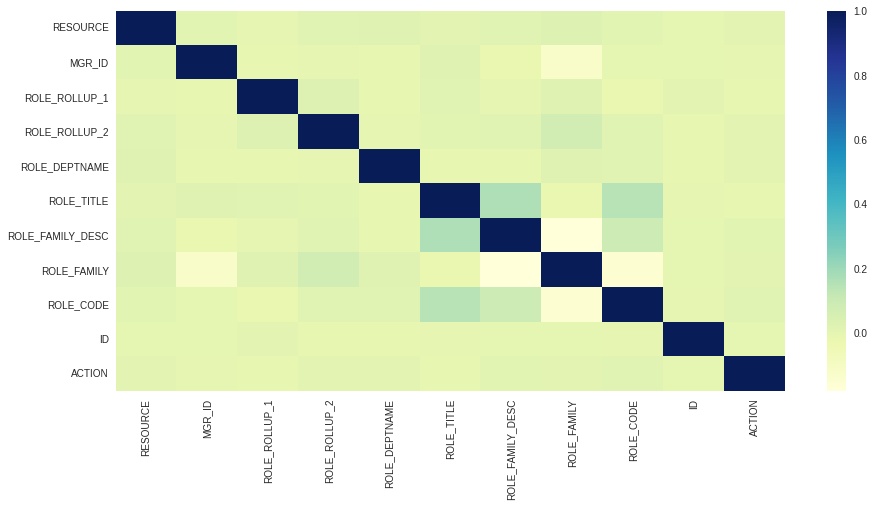

In [14]:
fig = plt.figure(figsize = [15, 7])
sns.heatmap(train.corr(), cmap='YlGnBu')

**Observations**:
----------------

> The distribution of the columns : **ROLE_ROLLUP_1** and **ROLE_ROLLUP_2** is negatively skewed.

> The distribution of the column **ROLE_CODE** is higly positively skewed.

> The is high positive correlation between the following pair of columns: 

  - **ROLE_ROLLUP_1** and **ROLE_ROLLUP_2**
  - **ROLE_TITLE, ROLE_FAMILY_DESC** and **ROLE_CODE**

 

# *Data Information*
-----------------------
-----------------------

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          24576 non-null  int64
 1   MGR_ID            24576 non-null  int64
 2   ROLE_ROLLUP_1     24576 non-null  int64
 3   ROLE_ROLLUP_2     24576 non-null  int64
 4   ROLE_DEPTNAME     24576 non-null  int64
 5   ROLE_TITLE        24576 non-null  int64
 6   ROLE_FAMILY_DESC  24576 non-null  int64
 7   ROLE_FAMILY       24576 non-null  int64
 8   ROLE_CODE         24576 non-null  int64
 9   ID                24576 non-null  int64
 10  ACTION            24576 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


In [16]:
train.nunique()

RESOURCE             6469
MGR_ID               3996
ROLE_ROLLUP_1         123
ROLE_ROLLUP_2         168
ROLE_DEPTNAME         440
ROLE_TITLE            331
ROLE_FAMILY_DESC     2183
ROLE_FAMILY            64
ROLE_CODE             331
ID                  24576
ACTION                  2
dtype: int64

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8193 entries, 0 to 8192
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          8193 non-null   int64
 1   MGR_ID            8193 non-null   int64
 2   ROLE_ROLLUP_1     8193 non-null   int64
 3   ROLE_ROLLUP_2     8193 non-null   int64
 4   ROLE_DEPTNAME     8193 non-null   int64
 5   ROLE_TITLE        8193 non-null   int64
 6   ROLE_FAMILY_DESC  8193 non-null   int64
 7   ROLE_FAMILY       8193 non-null   int64
 8   ROLE_CODE         8193 non-null   int64
 9   ID                8193 non-null   int64
dtypes: int64(10)
memory usage: 640.2 KB


In [18]:
test.nunique()

RESOURCE            3361
MGR_ID              2786
ROLE_ROLLUP_1        116
ROLE_ROLLUP_2        159
ROLE_DEPTNAME        403
ROLE_TITLE           289
ROLE_FAMILY_DESC    1408
ROLE_FAMILY           62
ROLE_CODE            289
ID                  8193
dtype: int64

**Observations**:
----------------

> **Train Dataset**
     - The train dataset has total **24576 rows and 11 features** :  All features are of **int64** datatype.

> **Test Dataset**
     - The test dataset has total **8193 rows and 10 features** :  All features are of **int64** datatype. 

> The target variable is the column: **ACTION** which is equal to value **1** if the resource was approved and **0** otherwise. Since it is a **Classification** problem the output variable should be converted into classes with **1- YES** and **0 - NO**.


# *Data Pre-Profiling*

-----------------------
-----------------------

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.



In [19]:
# profile = ProfileReport(df = train)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

In [20]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre Profiling Report.html')      # Use only if you are using Google Colab, otherwise remove it

# *Data Pre-Processing*

-----------------------
-----------------------

## **Missing Values Imputation**

In [21]:
train.isna().sum()

RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
ID                  0
ACTION              0
dtype: int64

In [22]:
test.isna().sum()

RESOURCE            0
MGR_ID              0
ROLE_ROLLUP_1       0
ROLE_ROLLUP_2       0
ROLE_DEPTNAME       0
ROLE_TITLE          0
ROLE_FAMILY_DESC    0
ROLE_FAMILY         0
ROLE_CODE           0
ID                  0
dtype: int64

## **Inconsistencies**

In [23]:
train.duplicated().value_counts()

False    24576
dtype: int64

In [24]:
test.duplicated().value_counts()

False    8193
dtype: int64

In [25]:
train['MGR_ID'].value_counts()

770      111
2270      66
2594      63
1350      56
2014      54
        ... 
52224      1
22355      1
76827      1
13199      1
5926       1
Name: MGR_ID, Length: 3996, dtype: int64

In [26]:
train['ROLE_ROLLUP_1'].value_counts()

117961    15994
117902      562
91261       544
118315      379
118212      309
          ...  
147236        1
209434        1
118774        1
203209        1
119343        1
Name: ROLE_ROLLUP_1, Length: 123, dtype: int64

In [27]:
train['ROLE_ROLLUP_2'].value_counts()

118300    3342
118343    2993
118327    1960
118225    1895
118386    1321
          ... 
118775       1
132840       1
132564       1
286791       1
119344       1
Name: ROLE_ROLLUP_2, Length: 168, dtype: int64

In [28]:
train['ROLE_DEPTNAME'].value_counts()

117878    856
117941    596
118514    467
117945    465
117920    454
         ... 
119496      1
129578      1
127155      1
29113       1
132480      1
Name: ROLE_DEPTNAME, Length: 440, dtype: int64

In [29]:
train['RESOURCE'].value_counts()

4675     638
79092    347
75078    321
25993    317
3853     295
        ... 
45239      1
31225      1
72188      1
19768      1
34963      1
Name: RESOURCE, Length: 6469, dtype: int64

In [30]:
train['ROLE_FAMILY'].value_counts()

290919    8278
118424    2028
19721     2016
117887    1775
292795     968
          ... 
143398       3
130364       2
149353       2
254395       2
161100       1
Name: ROLE_FAMILY, Length: 64, dtype: int64

In [31]:
train['ROLE_FAMILY_DESC'].value_counts()

117906    5184
240983     937
117913     513
279443     473
117886     399
          ... 
151952       1
121946       1
142741       1
171722       1
236793       1
Name: ROLE_FAMILY_DESC, Length: 2183, dtype: int64

In [32]:
train['ACTION'].value_counts()

1    23148
0     1428
Name: ACTION, dtype: int64

In [33]:
train['ROLE_TITLE'].value_counts()

118321    3456
117905    2701
118784    1368
117879     963
118568     800
          ... 
127031       1
208126       1
130284       1
157347       1
149916       1
Name: ROLE_TITLE, Length: 331, dtype: int64

In [34]:
train['ROLE_CODE'].value_counts() 

118322    3456
117908    2701
118786    1368
117880     963
118570     800
          ... 
127032       1
208127       1
130285       1
157348       1
149918       1
Name: ROLE_CODE, Length: 331, dtype: int64

# *Exploratory Data Analysis*
-----------------------
-----------------------

**Question 1: What is the distribution of the requests granted to those rejected?**

In [35]:
train['ACTION'].value_counts()/train['ACTION'].shape[0] *100

1    94.189453
0     5.810547
Name: ACTION, dtype: float64

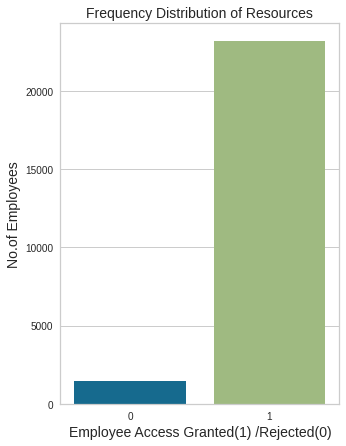

In [36]:
fig = plt.figure(figsize = [5, 7])
sns.countplot(x = 'ACTION', data = train)
plt.xlabel(xlabel = 'Employee Access Granted(1) /Rejected(0)', size = 14)
plt.ylabel(ylabel = 'No.of Employees', size = 14)
plt.title(label = 'Frequency Distribution of Resources', size = 14)
plt.show()

**Observations:**

- We can observe that there is a huge imbalance in the dataset with the no.of requests granted being ~94% and those rejected being ~6%.

**Question 2: Which were the top five most requested resources as per the dataset?**

In [37]:
Resources = train['RESOURCE'].value_counts().nlargest(5).index[:]
Top_5_Rsrc = train[train['RESOURCE'].isin(Resources)]
Top_5_Rsrc['RESOURCE'].value_counts()

4675     638
79092    347
75078    321
25993    317
3853     295
Name: RESOURCE, dtype: int64

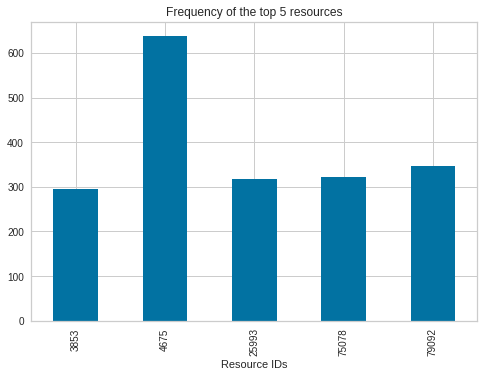

In [38]:
train['RESOURCE'].value_counts().nlargest(5).sort_index().plot.bar()
plt.xlabel("Resource IDs")
plt.title("Frequency of the top 5 resources")
plt.show()

**Observations:**

- It is observed that the highly preferred resource is the resource with ID: **4675**.
- The resources with IDs: **79092**, **75078** and **25993** have almost the same priority. 

**Question 3: Most of the employees belong to which departments?**

In [39]:
df1 = train['ROLE_DEPTNAME'].value_counts().nlargest(10)
df1.index

Int64Index([117878, 117941, 118514, 117945, 117920, 117884, 118403, 119598,
            119181, 120722],
           dtype='int64')

In [40]:
df2 = train[train['ROLE_DEPTNAME'].isin(df1.index)]

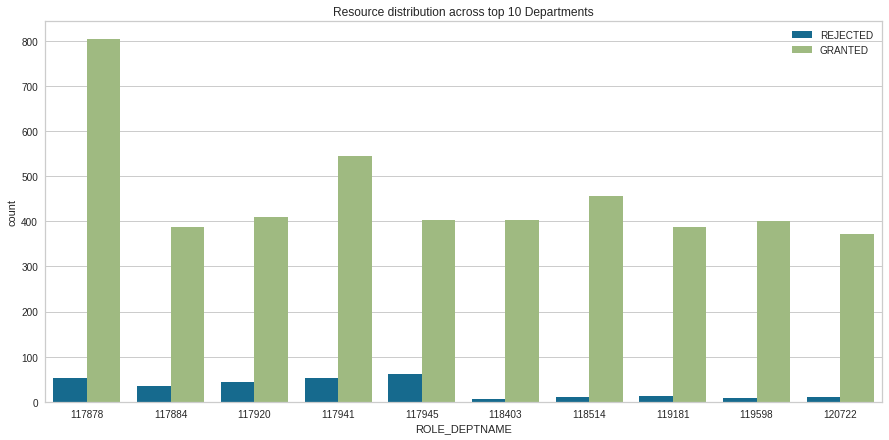

In [41]:
fig = plt.figure(figsize = [15, 7])
sns.countplot(data = df2, x = 'ROLE_DEPTNAME', hue = 'ACTION')
plt.legend(labels=['REJECTED','GRANTED'])
plt.title("Resource distribution across top 10 Departments")
plt.show()

**Observations:**

- There are total **440** departments as per the dataset.
- It is observed that top **10** departmnets out of the **440** that most of the employees belong have the following IDs: **117878, 117941, 118514, 117945, 117920, 117884, 118403, 119598,119181 and 120722**.
- The departmnet with the maximum no. of employees belong to the department ID: **117878**. The employees of this department have been granted access to resources more as compared to other departments.

**Question 4: What is the association between the column: 'MGR_ID' and target column: 'ACTION' ?**

In [42]:
df1 = train['MGR_ID'].value_counts().nlargest(20)
df1

770      111
2270      66
2594      63
1350      56
2014      54
16850     52
5396      50
7807      47
18213     46
18686     46
3526      46
4659      45
54618     45
3281      45
7411      44
7578      44
7389      43
5244      43
3966      43
7551      43
Name: MGR_ID, dtype: int64

In [43]:
df2 = train[train['MGR_ID'].isin(df1.index)]
df2

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
18,75078,18686,117961,118386,121883,117905,290919,290919,117908,24266,1
51,35469,3966,117961,118343,122012,117905,240983,290919,117908,22887,1
68,43872,2270,117961,118413,120584,120773,118959,118960,120774,14131,1
88,25993,18213,117961,118386,118746,118747,160002,118453,118749,10479,1
94,31044,770,117961,118300,119181,118451,130134,118453,118454,21178,1
...,...,...,...,...,...,...,...,...,...,...,...
24498,116607,7578,117961,118343,120722,118784,121873,290919,118786,21870,1
24544,27804,18686,117961,118386,128823,118321,117906,290919,118322,20939,1
24554,79652,7578,117961,118343,120722,118784,121873,290919,118786,769,1
24564,69390,3526,117961,118225,120323,119093,121698,119095,119096,4426,1


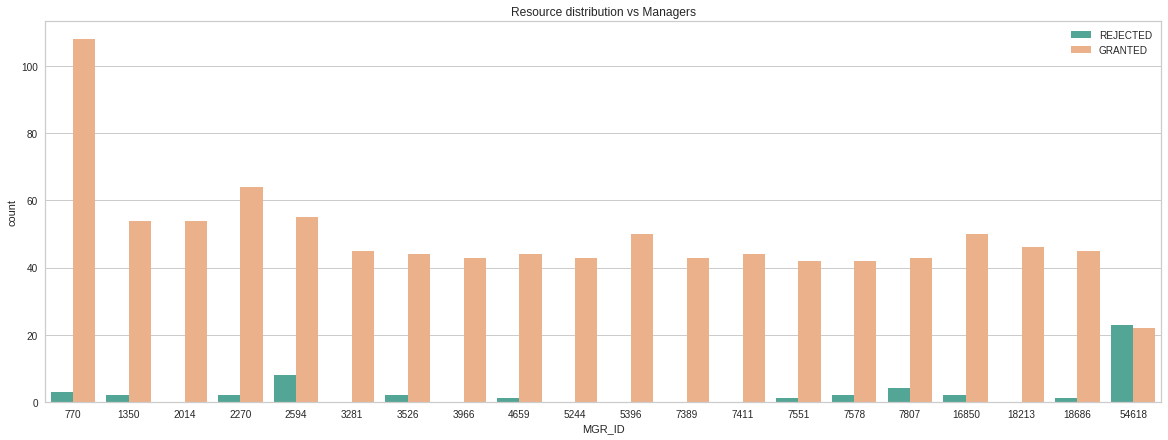

In [44]:
fig = plt.figure(figsize = [20, 7])
sns.countplot(data = df2, x = 'MGR_ID', hue = 'ACTION', palette=['#45B39D',"#FAAE7B"])
plt.legend(labels=['REJECTED','GRANTED'])
plt.title("Resource distribution vs Managers")
plt.show()

In [45]:
train[train['MGR_ID'] == train['ID']]

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
6941,20364,8709,117961,118300,128830,118054,118054,117887,118055,8709,1
16900,6682,5506,117961,118343,118514,118321,117906,290919,118322,5506,1


In [46]:
tr1 = train[train['MGR_ID'] == 8709]
tr1

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
6941,20364,8709,117961,118300,128830,118054,118054,117887,118055,8709,1
7574,32270,8709,117961,118300,128830,118054,118054,117887,118055,30689,1
13552,23921,8709,117961,118300,128830,118054,118054,117887,118055,22193,1
14162,42093,8709,117961,118300,128830,118054,118054,117887,118055,32630,1
18891,23489,8709,117961,118300,128830,118054,118054,117887,118055,17910,1
22158,45481,8709,117961,118300,128830,118054,118054,117887,118055,8712,1


In [47]:
tr2 = train[train['MGR_ID'] == 5506]
tr2

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
2017,75834,5506,117961,118343,118514,118321,117906,290919,118322,31063,1
7097,34430,5506,117961,118343,118514,118321,117906,290919,118322,740,1
11529,25570,5506,117961,118343,118514,118321,117906,290919,118322,14238,1
16900,6682,5506,117961,118343,118514,118321,117906,290919,118322,5506,1


**Observations:**

- There are total **3996** managers as per the dataset.
- It is observed that the manager with ID: **770** has a total of **111** employees reporting to him. Most of these employees have been granted access to the requested resources.
- There are two employees (IDs: **8709** and **5506**) who do not have managers as their **MGR_ID** and **ID** values are the same. They must be holding the highest positions.
  - There are 5 employees reporting to manager with ID: **8709** in the department with ID: **128830**.
  - There are 3 employees reporting to manager with ID: **5506** in the department with ID: **118514**.

**Question 5: How many employees are such that their 'ROLE_ROLLUP_1' ID is same as 'ROLE_ROLLUP_2' ID?**

In [48]:
train['ROLE_ROLLUP_2'].value_counts()

118300    3342
118343    2993
118327    1960
118225    1895
118386    1321
          ... 
118775       1
132840       1
132564       1
286791       1
119344       1
Name: ROLE_ROLLUP_2, Length: 168, dtype: int64

In [49]:
train[train['ROLE_ROLLUP_1'] == train['ROLE_ROLLUP_2']].shape[0]

7

In [50]:
train[train['ROLE_ROLLUP_1'] == train['ROLE_ROLLUP_2']]

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
3106,43952,30488,119370,119370,123858,118702,144264,118704,118705,26878,1
7980,16459,30488,119370,119370,118701,118702,148866,118704,118705,21063,1
12178,34516,30488,119370,119370,118701,118702,198449,118704,118705,31557,1
14520,41279,4260,119370,119370,123858,118702,144264,118704,118705,27249,1
21364,41279,30488,119370,119370,118701,118702,148866,118704,118705,18344,1
22937,3853,30488,119370,119370,118701,118702,132221,118704,118705,27696,1
23858,41279,21302,119370,119370,118471,134095,268675,118474,118475,5387,1


**Observations:**

- There are total **7** employees who have equal values ( = **119370**) in the columns:**ROLE_ROLLUP_1** and **ROLE_ROLLUP_2**.

- There is high correlation between the columns:**ROLE_ROLLUP_1** and **ROLE_ROLLUP_2**. Hence the column:**ROLE_ROLLUP_1** is being dropped from the dataset as it does not have much impact over the target variable.

**Question 6: What is the impact of role titles on the resource allocation to the employees ?**

In [51]:
train['ROLE_TITLE'].value_counts()
Role_Titles = train['ROLE_TITLE'].value_counts().nlargest(20)
Top_20_Role = train[train['ROLE_TITLE'].isin(Role_Titles.index)]

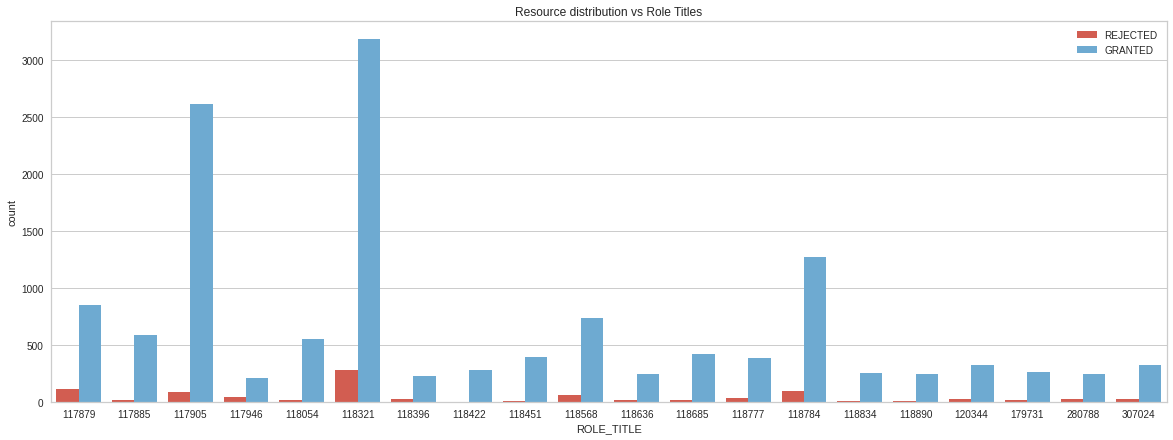

In [52]:
fig = plt.figure(figsize = [20, 7])
sns.countplot(data = Top_20_Role, x = 'ROLE_TITLE', hue = 'ACTION', palette=['#E74C3C',"#5DADE2"])
plt.legend(labels=['REJECTED','GRANTED'])
plt.title("Resource distribution vs Role Titles")
plt.show()

**Observations:**

- There are total **331** role titles as per the dataset.

- It is observed that most of the employees with role title ID: **118321** have been granted access to the requested resource. This trend is followed for employees with role IDs: **117905** and **118784**.

**Question 7: What is the impact of Company role family description on the resource allocation to the employees ?**

**A**)   **ROLE_FAMILY_DESC**

In [53]:
train['ROLE_FAMILY_DESC'].value_counts()
Role_Titles = train['ROLE_FAMILY_DESC'].value_counts().nlargest(20).sort_index()
Top_20_RoleFmlyDesc = train[train['ROLE_FAMILY_DESC'].isin(Role_Titles.index)]

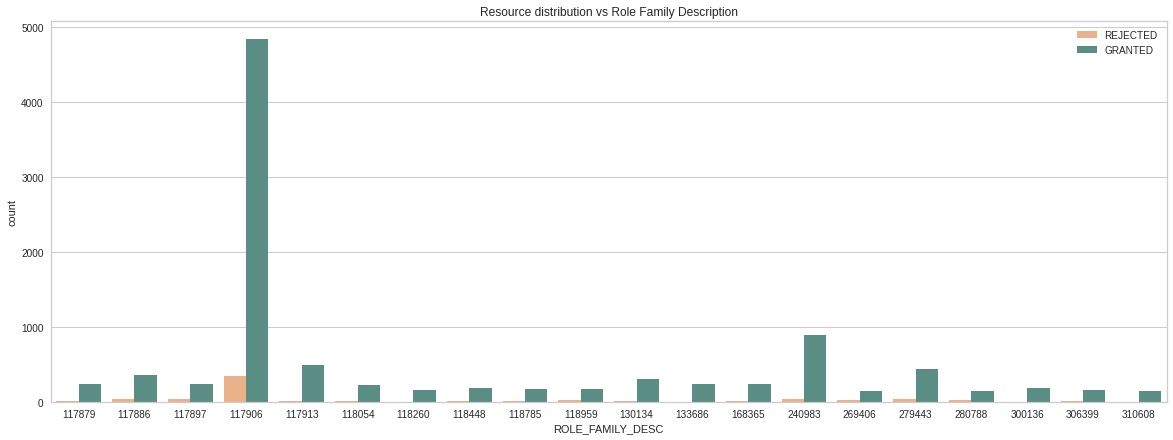

In [54]:
fig = plt.figure(figsize = [20, 7])
sns.countplot(data = Top_20_RoleFmlyDesc, x = 'ROLE_FAMILY_DESC', hue = 'ACTION', palette=['#FAAE7B',"#519588"])
plt.legend(labels=['REJECTED','GRANTED'])
plt.title("Resource distribution vs Role Family Description")
plt.show()

**B**)   **ROLE_FAMILY**

In [55]:
train['ROLE_FAMILY'].value_counts()
Role_Titles = train['ROLE_FAMILY'].value_counts().nlargest(20).sort_index()
Top_20_RoleFmly = train[train['ROLE_FAMILY'].isin(Role_Titles.index)]

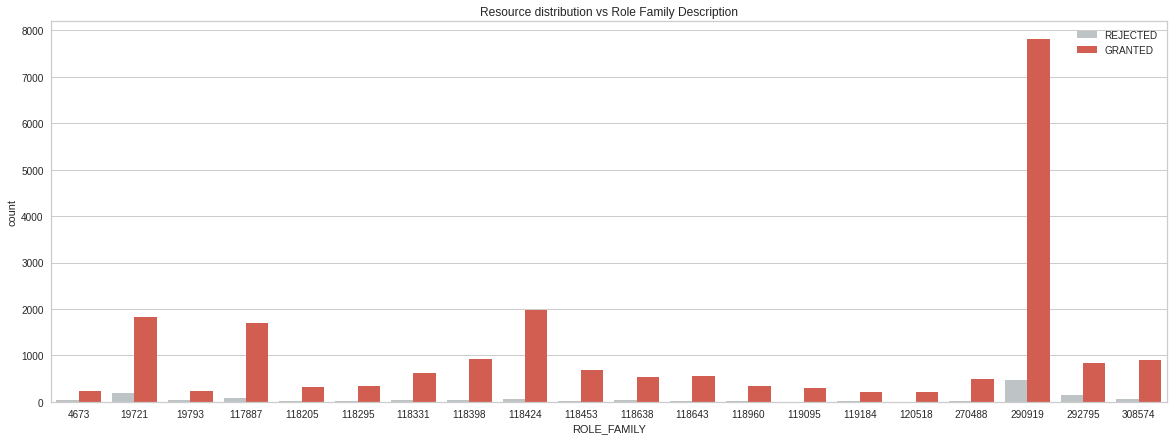

In [56]:
fig = plt.figure(figsize = [20, 7])
sns.countplot(data = Top_20_RoleFmly, x = 'ROLE_FAMILY', hue = 'ACTION', palette=['#BDC3C7',"#E74C3C"])
plt.legend(labels=['REJECTED','GRANTED'])
plt.title("Resource distribution vs Role Family Description")
plt.show()

In [57]:
train[train['ROLE_FAMILY'] == train['ROLE_FAMILY_DESC']]

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
18,75078,18686,117961,118386,121883,117905,290919,290919,117908,24266,1
70,34924,4589,117961,118327,120383,117905,290919,290919,117908,18650,1
161,30630,16147,118541,118542,120539,118777,308574,308574,118779,24839,1
267,73542,16756,119062,130600,139677,117905,290919,290919,117908,15766,1
479,29295,16147,118541,118542,120539,118777,308574,308574,118779,4692,1
...,...,...,...,...,...,...,...,...,...,...,...
23061,87696,4698,117961,117962,118352,118321,290919,290919,118322,18755,1
23244,31246,783,117961,118413,127522,128230,4673,4673,128231,24579,1
23448,16191,7629,117961,118327,120383,117905,290919,290919,117908,4892,1
23664,44812,1311,117961,117962,118910,119346,4673,4673,119348,28861,1


**Observations:**

- There are total **97** employees who have equal values in the columns:**ROLE_FAMILY** and **ROLE_FAMILY_DESC**.

- Hence the column:**ROLE_FAMILY** is being dropped from the dataset as it does not seem to have much impact over the target variable.

**Question 8: What is the association between the columns: "ROLE_TITLE" and "ROLE_CODE" ?**

In [58]:
train['ROLE_TITLE'].value_counts()
Role_Titles = train['ROLE_TITLE'].value_counts().nlargest(10)
Top_10_Role = train[train['ROLE_TITLE'].isin(Role_Titles.index)]
Role_Titles

118321    3456
117905    2701
118784    1368
117879     963
118568     800
117885     606
118054     567
118685     429
118777     419
118451     400
Name: ROLE_TITLE, dtype: int64

In [59]:
train['ROLE_CODE'].value_counts()
Role_Codes = train['ROLE_CODE'].value_counts().nlargest(10)
Top_10_RollCodes = train[train['ROLE_CODE'].isin(Role_Codes.index)]
Role_Codes

118322    3456
117908    2701
118786    1368
117880     963
118570     800
117888     606
118055     567
118687     429
118779     419
118454     400
Name: ROLE_CODE, dtype: int64

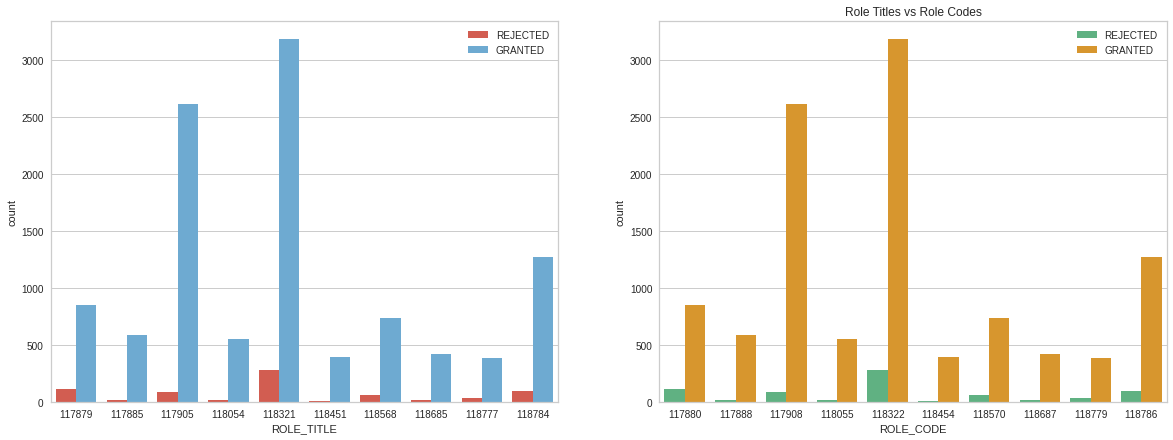

In [60]:
fig = plt.figure(figsize = [20, 7])
plt.subplot(1,2,1)
sns.countplot(data = Top_10_Role, x = 'ROLE_TITLE', hue = 'ACTION', palette=['#E74C3C',"#5DADE2"])
plt.legend(labels=['REJECTED','GRANTED'])


plt.subplot(1,2,2)
sns.countplot(data = Top_10_RollCodes, x = 'ROLE_CODE', hue = 'ACTION', palette=['#52BE80',"#F39C12"])
plt.legend(labels=['REJECTED','GRANTED'])

plt.title("Role Titles vs Role Codes")

plt.show()

**Observations:**

- It is observed that the columns:**ROLE_CODE** and **ROLE_TITLE** have the same distribution and hence are representing the redundant data.

- Hence the column:**ROLE_CODE** is being dropped from the dataset as it does not seem to have much impact over the target variable.

# *Post Data Processing & Feature Selection*
-----------------------
-----------------------
- In this section, we will perform **encoding** over **categorical** features and **feed** the result to the **Random Forest** model.

- **Random Forest** will then **identify important features** for our model **using some threshold**.

- This threshold is **used over** the **information gain** which results in **reduction in impurity**.

- And **finally** we will **split** our **data** for the **model development**.

## **Feature Selection**

- Here we analyze the impact of input feature values over the target feature values.

- It is either done by performing **statistical tests** (Pearson, ANOVA, Chi-Square) or by using **Random Forest**.

- We will implement **SelectFromModel()** available in Sklearn which uses the base estimator to identify important features.

- The importance of a feature is determined based on **threshold** (a measure to calculate feature importance).
- As per EDA we are dropping the columns:'**ROLE_ROLLUP_1**','**ROLE_CODE**' and'**ROLE_FAMILY**' as they have less impact on the target column.

In [61]:
X = train.drop(['ACTION','ROLE_ROLLUP_1','ROLE_CODE','ROLE_FAMILY'],axis = 1)
y = train['ACTION']

In [62]:
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs = -1))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 3
Threshold set by Model: 0.14
Important Features: ['RESOURCE', 'MGR_ID', 'ID']


**Visualzation of Important Features:**

- Below features are plotted against their relative importance (in %age),  of each feature.

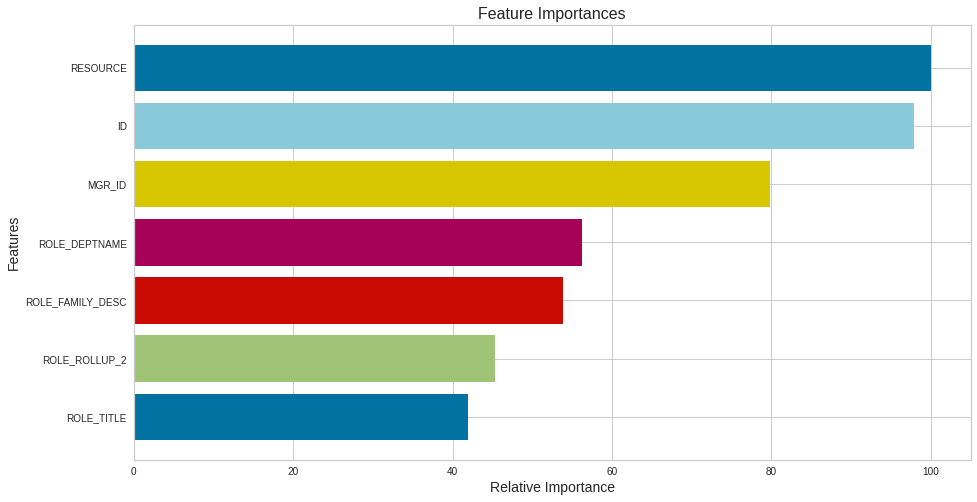

In [63]:
figure = plt.figure(figsize = [15, 8])

viz = FeatureImportances(selector.estimator)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

## **Data Preparation**

- Now we will **split** our **data** in **training** and **testing** part for further development.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

**Observation:**

- Now that we have split our data we are **ready** to move to the **next part** and that is Model Development & Evaluation.

# *Model Development & Evaluation*
-------------------
----------------------------

- In this section we will develop variety of models such as: 

  - Logistic Regression
  - Decision Tree 
  - Random Forest 
  - Adaptive Boosting
  - Gradient Boosting
  - XGBoost Classifier
  - CatBoost Classifier
  
- For estimating the **performance** of the **model** we will be using **accuracy** as a **metric**.

- Considering the complexity of data, we can run a **loop** over multiple **classifiers** and estimate the accuracy of the model.

- But in a real-life situation, one must train the model individually as then decide which model is best in which situation.

In [65]:
logreg = LogisticRegression(max_iter = 1000)
dtree = DecisionTreeClassifier(max_depth = 4,min_samples_split = 3, random_state =123)
rf_clf = RandomForestClassifier(n_estimators = 800, verbose = 1, random_state = 123)
ada_clf = AdaBoostClassifier(base_estimator=dtree, n_estimators=900, random_state=123)
gb_clf = GradientBoostingClassifier(n_estimators=900, learning_rate =0.08, random_state = 123)
xgb_clf = XGBClassifier(n_estimators = 900, learning_rate =0.06, max_depth=3, random_state =123)
catB_clf = CatBoostClassifier(iterations = 1000, learning_rate = 0.5)

In [66]:
clf_list = [logreg,dtree,rf_clf,ada_clf,gb_clf,xgb_clf,catB_clf]
clf_names = ["Logistic Regression","DecisionTree","RandomForest","AdaBoostClassifier","GradientBoosting","XGBoostClassifier","CatBoostClassifier"]
names = []
score1 = []
score2 = []
for a,b in zip(clf_list,clf_names):
    a.fit(X_train,y_train)
    pred_train=a.predict(X_train)
    pred_test=a.predict(X_test)
    score1.append(np.round(accuracy_score(y_train,pred_train),decimals = 5))
    score2.append(np.round(accuracy_score(y_test,pred_test),decimals = 5))
    names.append(a.__class__.__name__)
    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:   26.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    0.8s finished


0:	learn: 0.2994182	total: 54.5ms	remaining: 54.5s
1:	learn: 0.2346010	total: 61.3ms	remaining: 30.6s
2:	learn: 0.2209720	total: 68.1ms	remaining: 22.6s
3:	learn: 0.2150510	total: 75.3ms	remaining: 18.8s
4:	learn: 0.2104366	total: 82.2ms	remaining: 16.4s
5:	learn: 0.2084796	total: 89.2ms	remaining: 14.8s
6:	learn: 0.2072086	total: 96ms	remaining: 13.6s
7:	learn: 0.2045997	total: 103ms	remaining: 12.8s
8:	learn: 0.2023693	total: 110ms	remaining: 12.1s
9:	learn: 0.2009714	total: 117ms	remaining: 11.6s
10:	learn: 0.1987221	total: 124ms	remaining: 11.2s
11:	learn: 0.1955724	total: 131ms	remaining: 10.8s
12:	learn: 0.1932482	total: 139ms	remaining: 10.5s
13:	learn: 0.1916540	total: 146ms	remaining: 10.3s
14:	learn: 0.1905184	total: 153ms	remaining: 10s
15:	learn: 0.1891784	total: 160ms	remaining: 9.82s
16:	learn: 0.1872427	total: 167ms	remaining: 9.64s
17:	learn: 0.1859591	total: 174ms	remaining: 9.48s
18:	learn: 0.1839288	total: 181ms	remaining: 9.34s
19:	learn: 0.1832314	total: 199ms	rema

In [67]:
# Create an accuracy dataframe from scores and names list
accuracy_frame = pd.DataFrame(data={'Train Accuracy': score1, 'Test Accuracy': score2}, index=clf_names)

# View the accuracy of all the classifiers
accuracy_frame.transpose()

,Logistic Regression,DecisionTree,RandomForest,AdaBoostClassifier,GradientBoosting,XGBoostClassifier,CatBoostClassifier
Train Accuracy,0.94191,0.94242,1.00000,1.00000,0.95590,0.94741,0.99954
Test Accuracy,0.94182,0.94243,0.94996,0.94081,0.94406,0.94284,0.94752


**Observation:**

- The highest **accuracy** achieved on the **test set** is **94.996%** which is given by **RandomForestClassifier**.

- The next best models in the line are **CatBoostClassifier** which gave us an **accuracy** of **94.752%**.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## **Apply the Training Model to Test Dataset**

In [68]:
test_copy = test.drop(['ROLE_ROLLUP_1','ROLE_CODE','ROLE_FAMILY'], axis = 1)

In [69]:
ypred = rf_clf.predict(test_copy)
ypred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    1.3s finished


array([1, 1, 1, ..., 1, 1, 1])

In [70]:
ypred.shape[0]

8193

In [71]:
smpl_Col = ["ID", "ACTION"]
sample = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/sm24abr/Data_Repo/main/EmployeeAccessPred/sample_submission.csv', names = smpl_Col, header = None)
prd = pd.DataFrame(data = ypred, columns = ["ACTION"])
sample
finaldf = pd.concat([sample['ID'],prd],axis = 1)
finaldf.head()
# # # prd
finaldf.to_csv('submission.csv',header = None, index = False)
finaldf.head()

,ID,ACTION
0,18245,1
1,9226,1
2,27195,1
3,6478,1
4,4813,1
